# Nhập thư viện và dữ liệu

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import shap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import statsmodels.api as sm

In [4]:
# Đọc dữ liệu từ file CSV
employee_df = pd.read_csv('Human_Resources.csv')

In [5]:
# Kiểm tra dữ liệu
employee_df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


# Kiểm tra thông tin dữ liệu

In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Kiểm tra giá trị null
null_values = employee_df.isnull().sum()
null_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Xử lý và chuẩn bị dữ liệu

In [9]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

# Trực quan hóa dữ liệu

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: tit

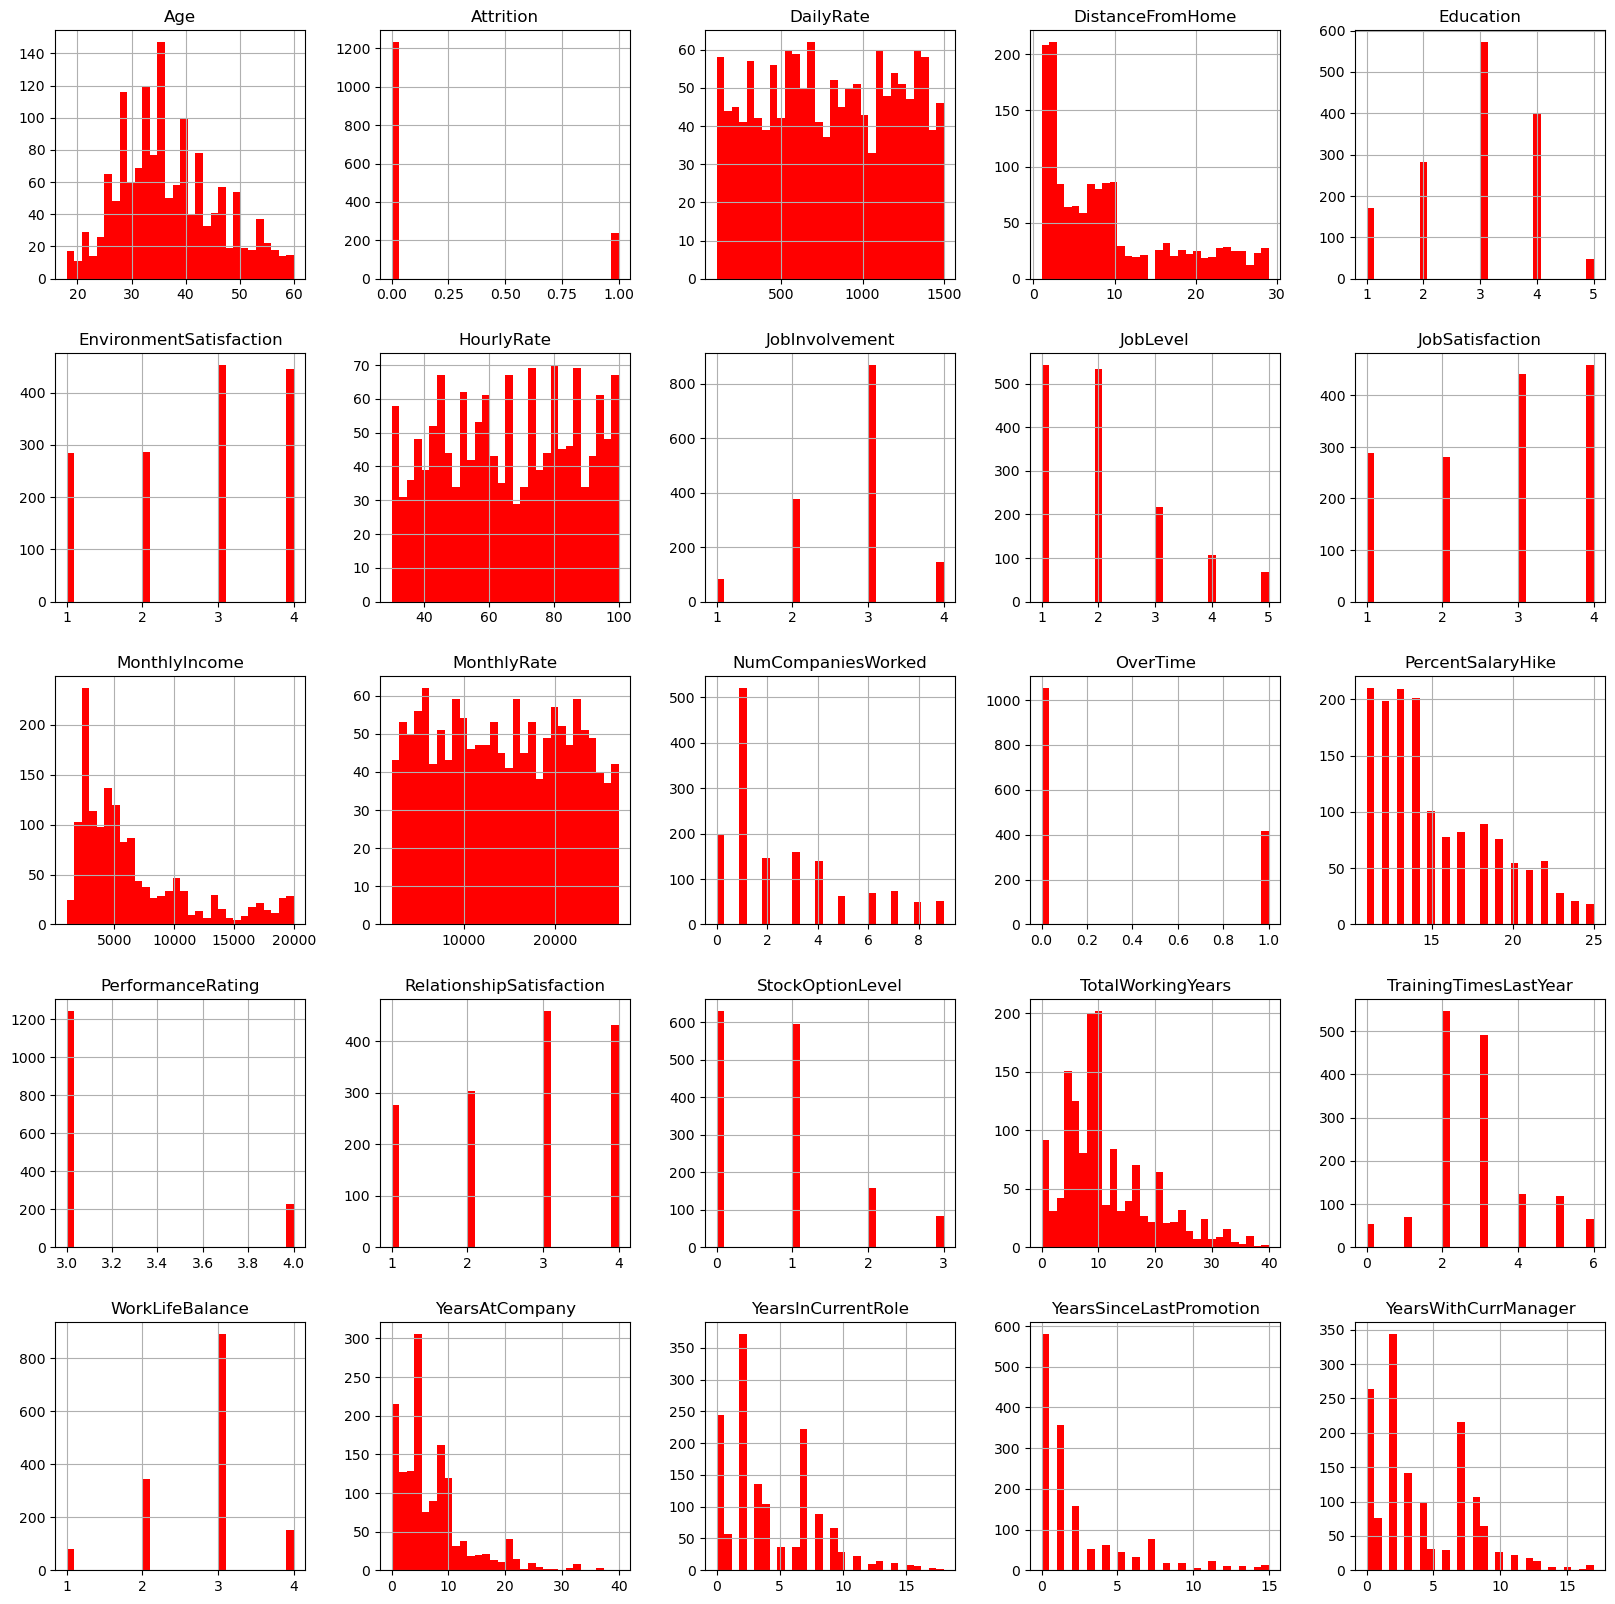

In [10]:
# Vẽ biểu đồ
employee_df.hist(bins = 30, figsize = (20,20), color = 'r')

<Axes: xlabel='Age', ylabel='count'>

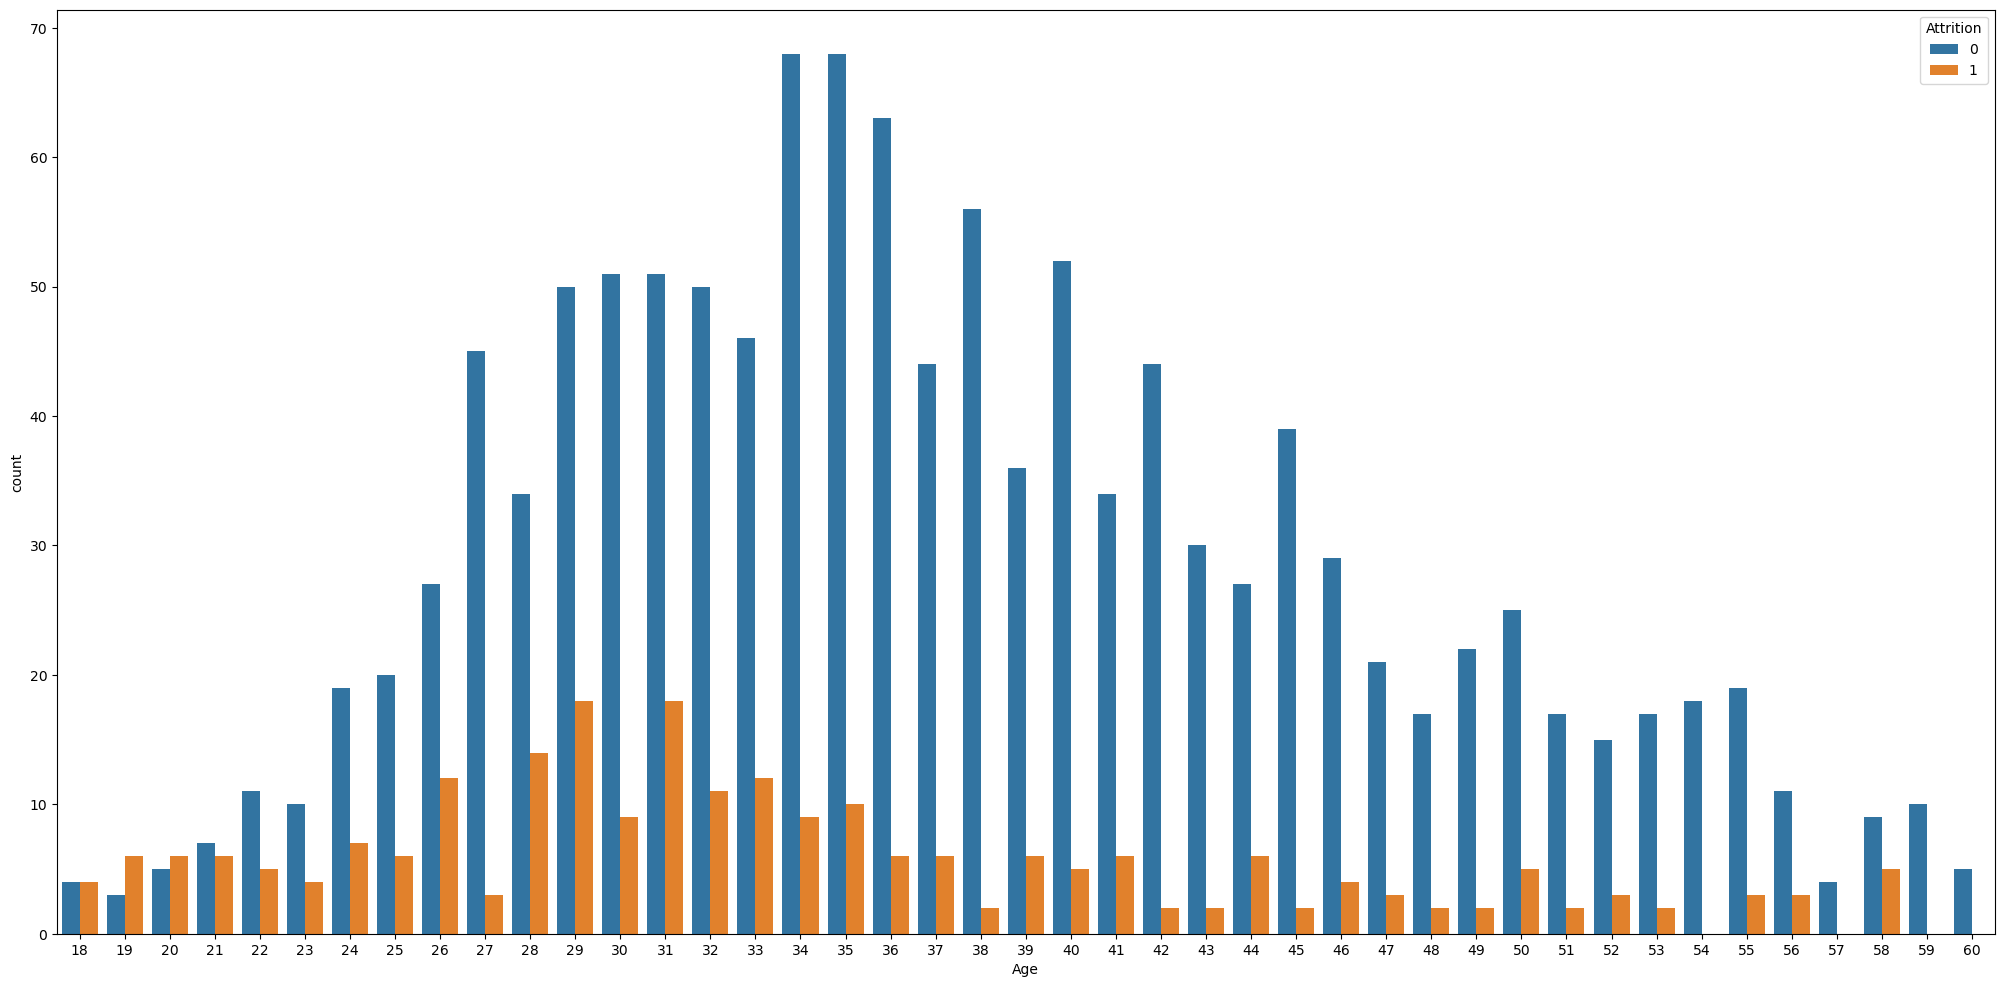

In [11]:
# Thể hiện tỷ lệ thất nghiệp so độ tuổi
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

<Axes: xlabel='JobLevel', ylabel='count'>

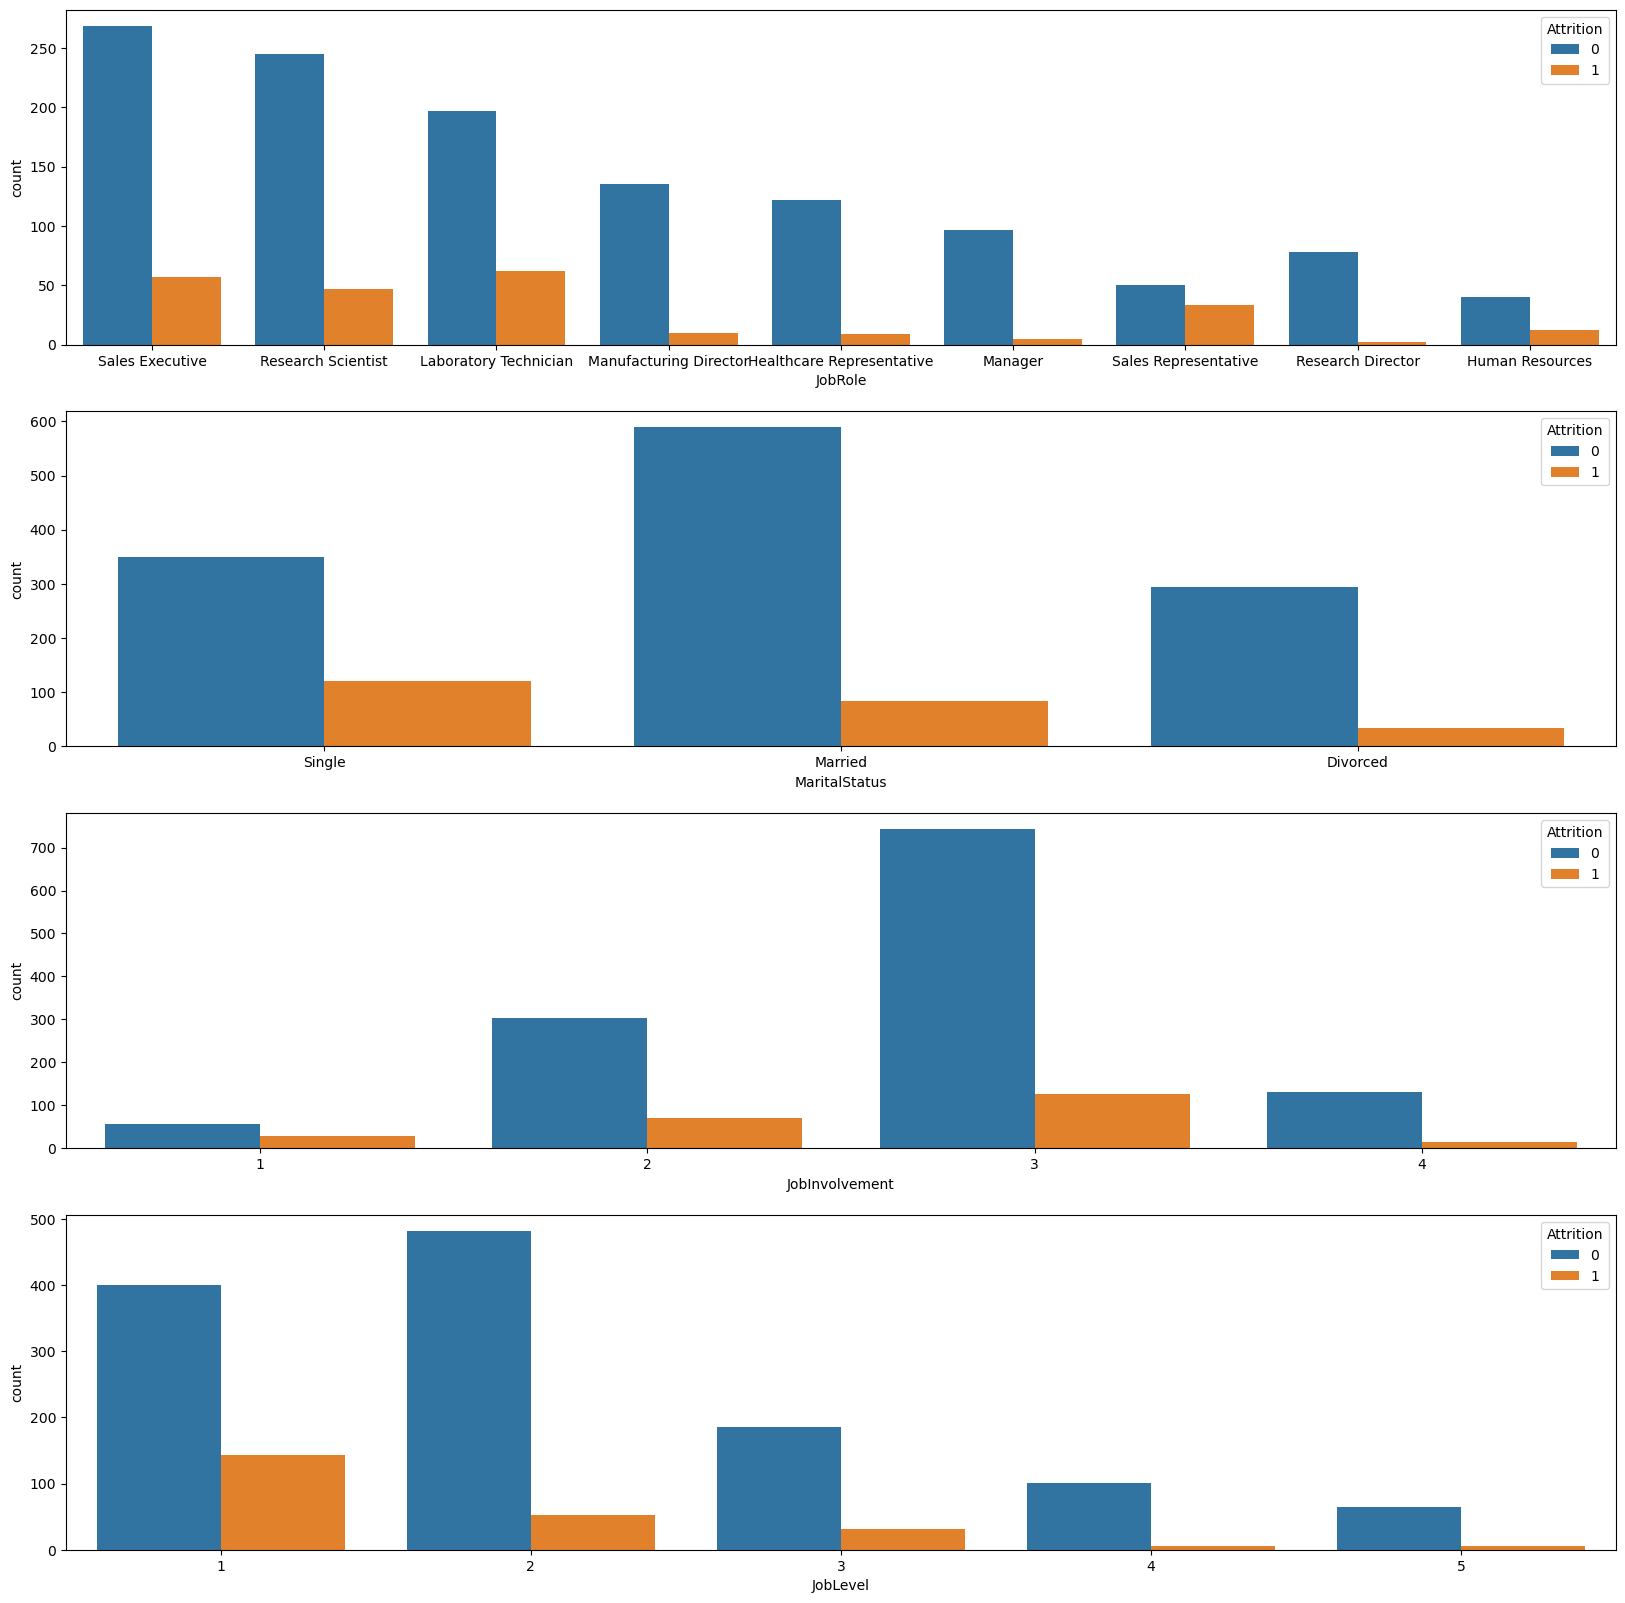

In [12]:
# Trực quan hóa các biến với việc nghỉ hoặc rời đi
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

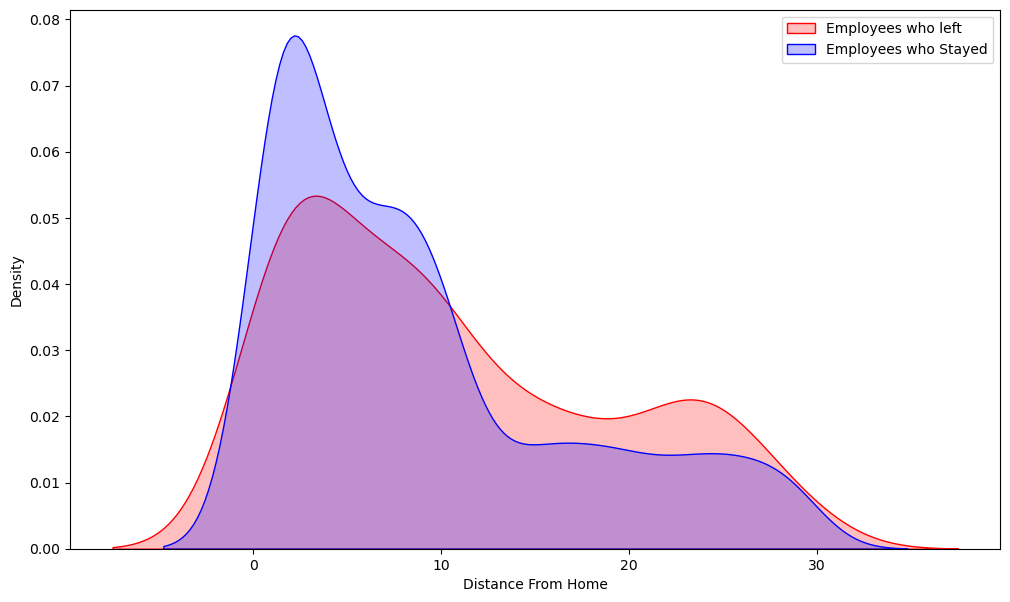

In [13]:
# Tạo biến left_df (nhân viên đã rời công ty) và stayed_df (nhân viên ở lại)
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

# Vẽ biểu đồ KDE để so sánh 'DistanceFromHome'
plt.figure(figsize=(12,7))

# Biểu đồ KDE cho nhân viên đã rời công ty
sns.kdeplot(left_df['DistanceFromHome'], label='Employees who left', fill=True, color='r')

# Biểu đồ KDE cho nhân viên ở lại
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employees who Stayed', fill=True, color='b')

# Ghi nhãn biểu đồ
plt.xlabel('Distance From Home')
plt.legend()
plt.show()

/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_45768/2541707139.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_45768/2541707139.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')


Text(0.5, 0, 'Years With Current Manager')

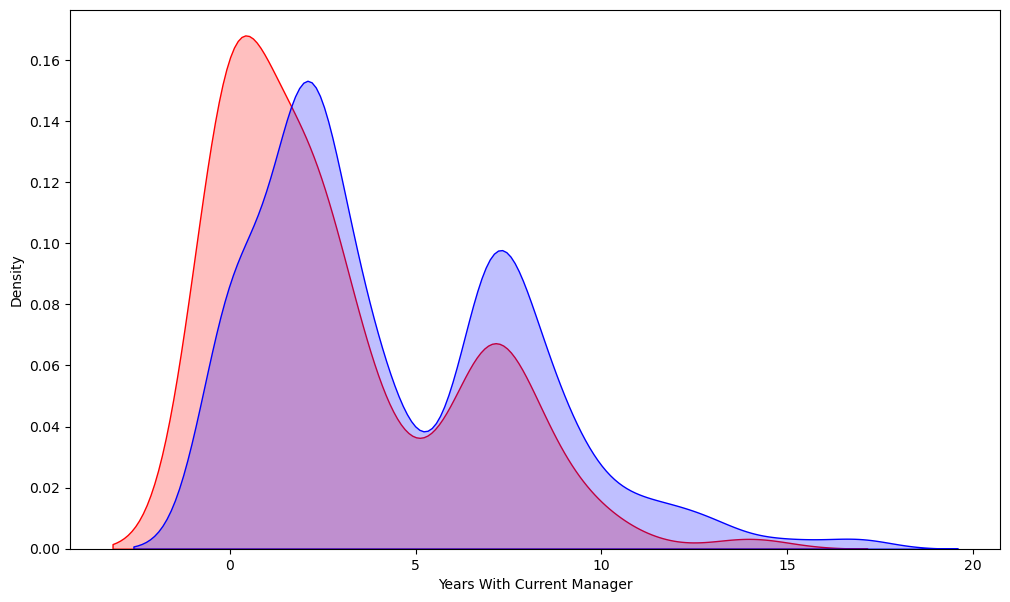

In [14]:
# Biểu đồ thể hiện mối liên hệ giữa việc nghỉ và khoảng cách từ nhà tới công ty
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_45768/496913388.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_45768/496913388.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')


Text(0.5, 0, 'Total Working Years')

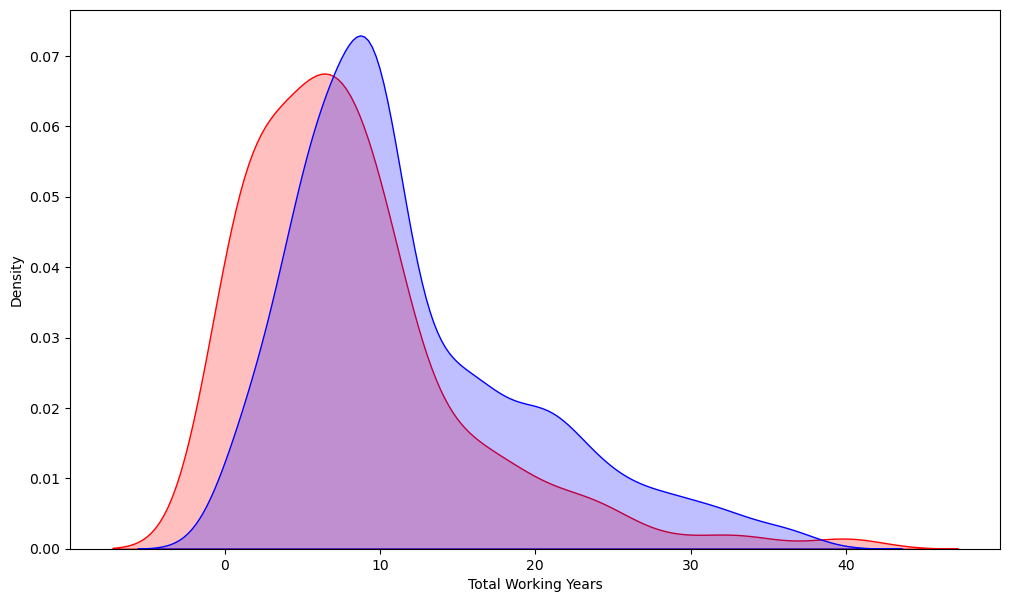

In [15]:
# Biểu đồ thể hiện mối liên hệ giữa việc nghỉ và Tổng thời gian cống hiến
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

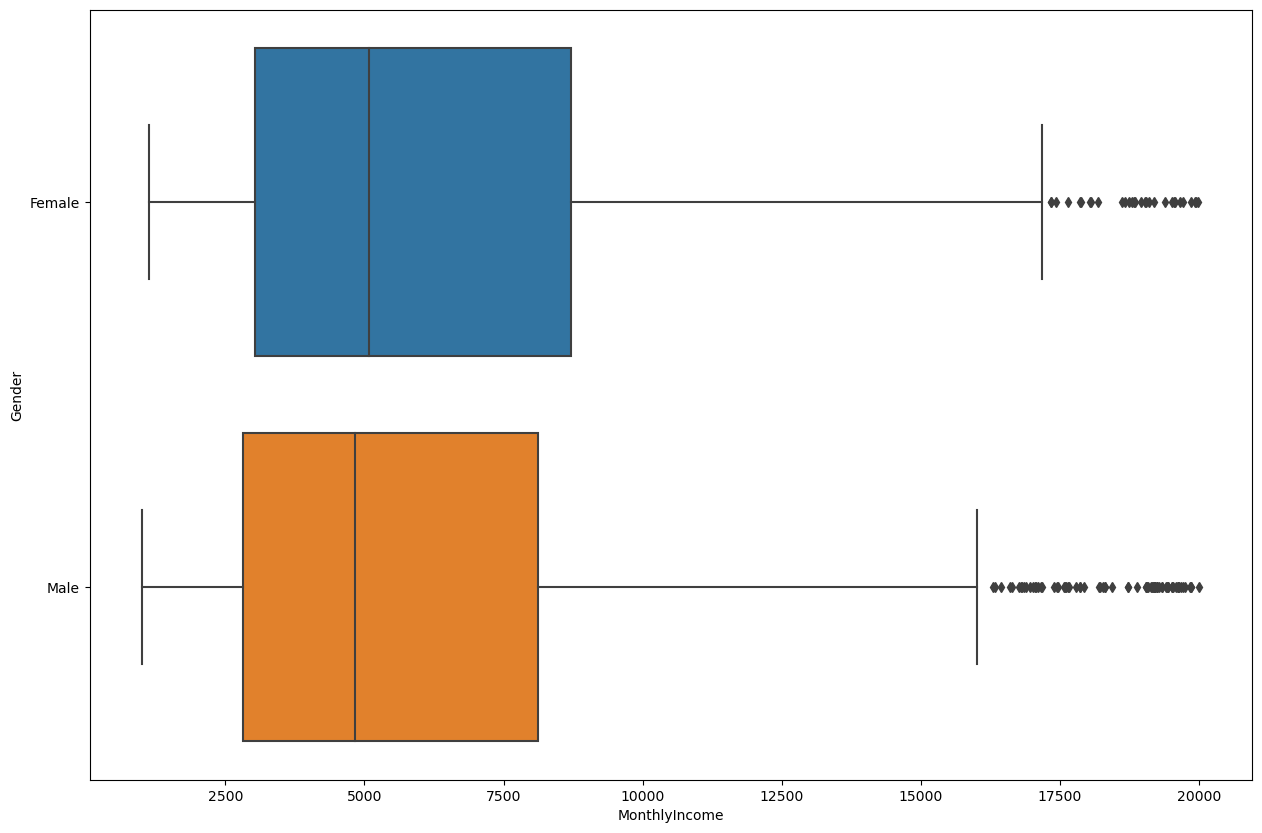

In [16]:
# Thống kê mức lương
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

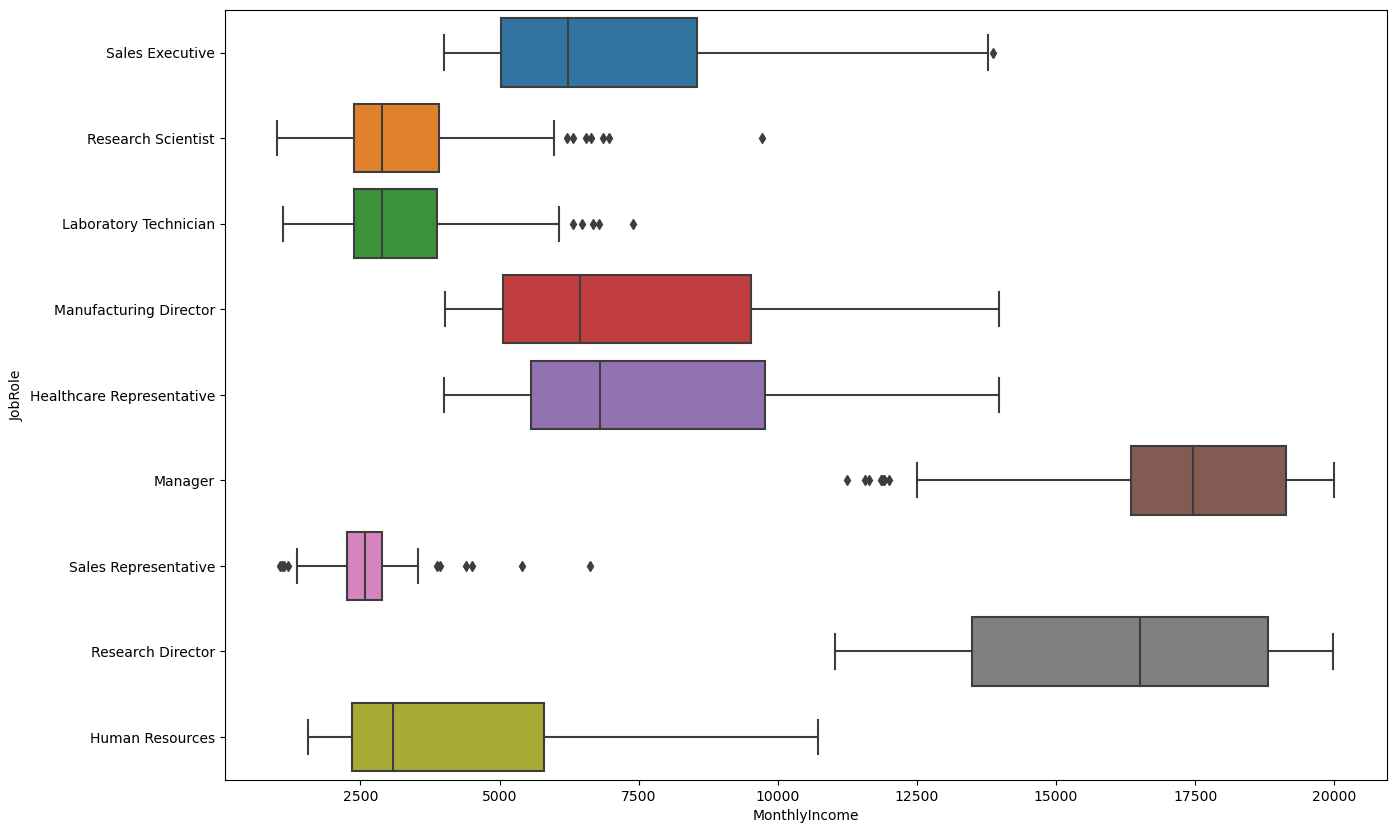

In [17]:
# Thống kê chi trả giữa các cấp
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)

In [18]:
# Kiểm tra số người đã rời khỏi công ty
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [19]:
print("Tổng số nhân viên =", len(employee_df))
print("Số người rời côn ty =", len(left_df))
print("Số người rời công ty =", 1.*len(left_df)/len(employee_df)*100.0, "%") 
print("Số người rời công ty =", len(stayed_df))
print("Số người ở lại =", 1.*len(stayed_df)/len(employee_df)*100.0, "%")

Tổng số nhân viên = 1470
Số người rời côn ty = 237
Số người rời công ty = 16.122448979591837 %
Số người rời công ty = 1233
Số người ở lại = 83.87755102040816 %


# Kiểm tra lại thống kê

In [20]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [21]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


# Đánh giá tương quan để dựng mô hình


/var/folders/gf/y5vh58_s74zbjmv9_q1bf25r0000gn/T/ipykernel_45768/1709660398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = employee_df.corr()


<Axes: >

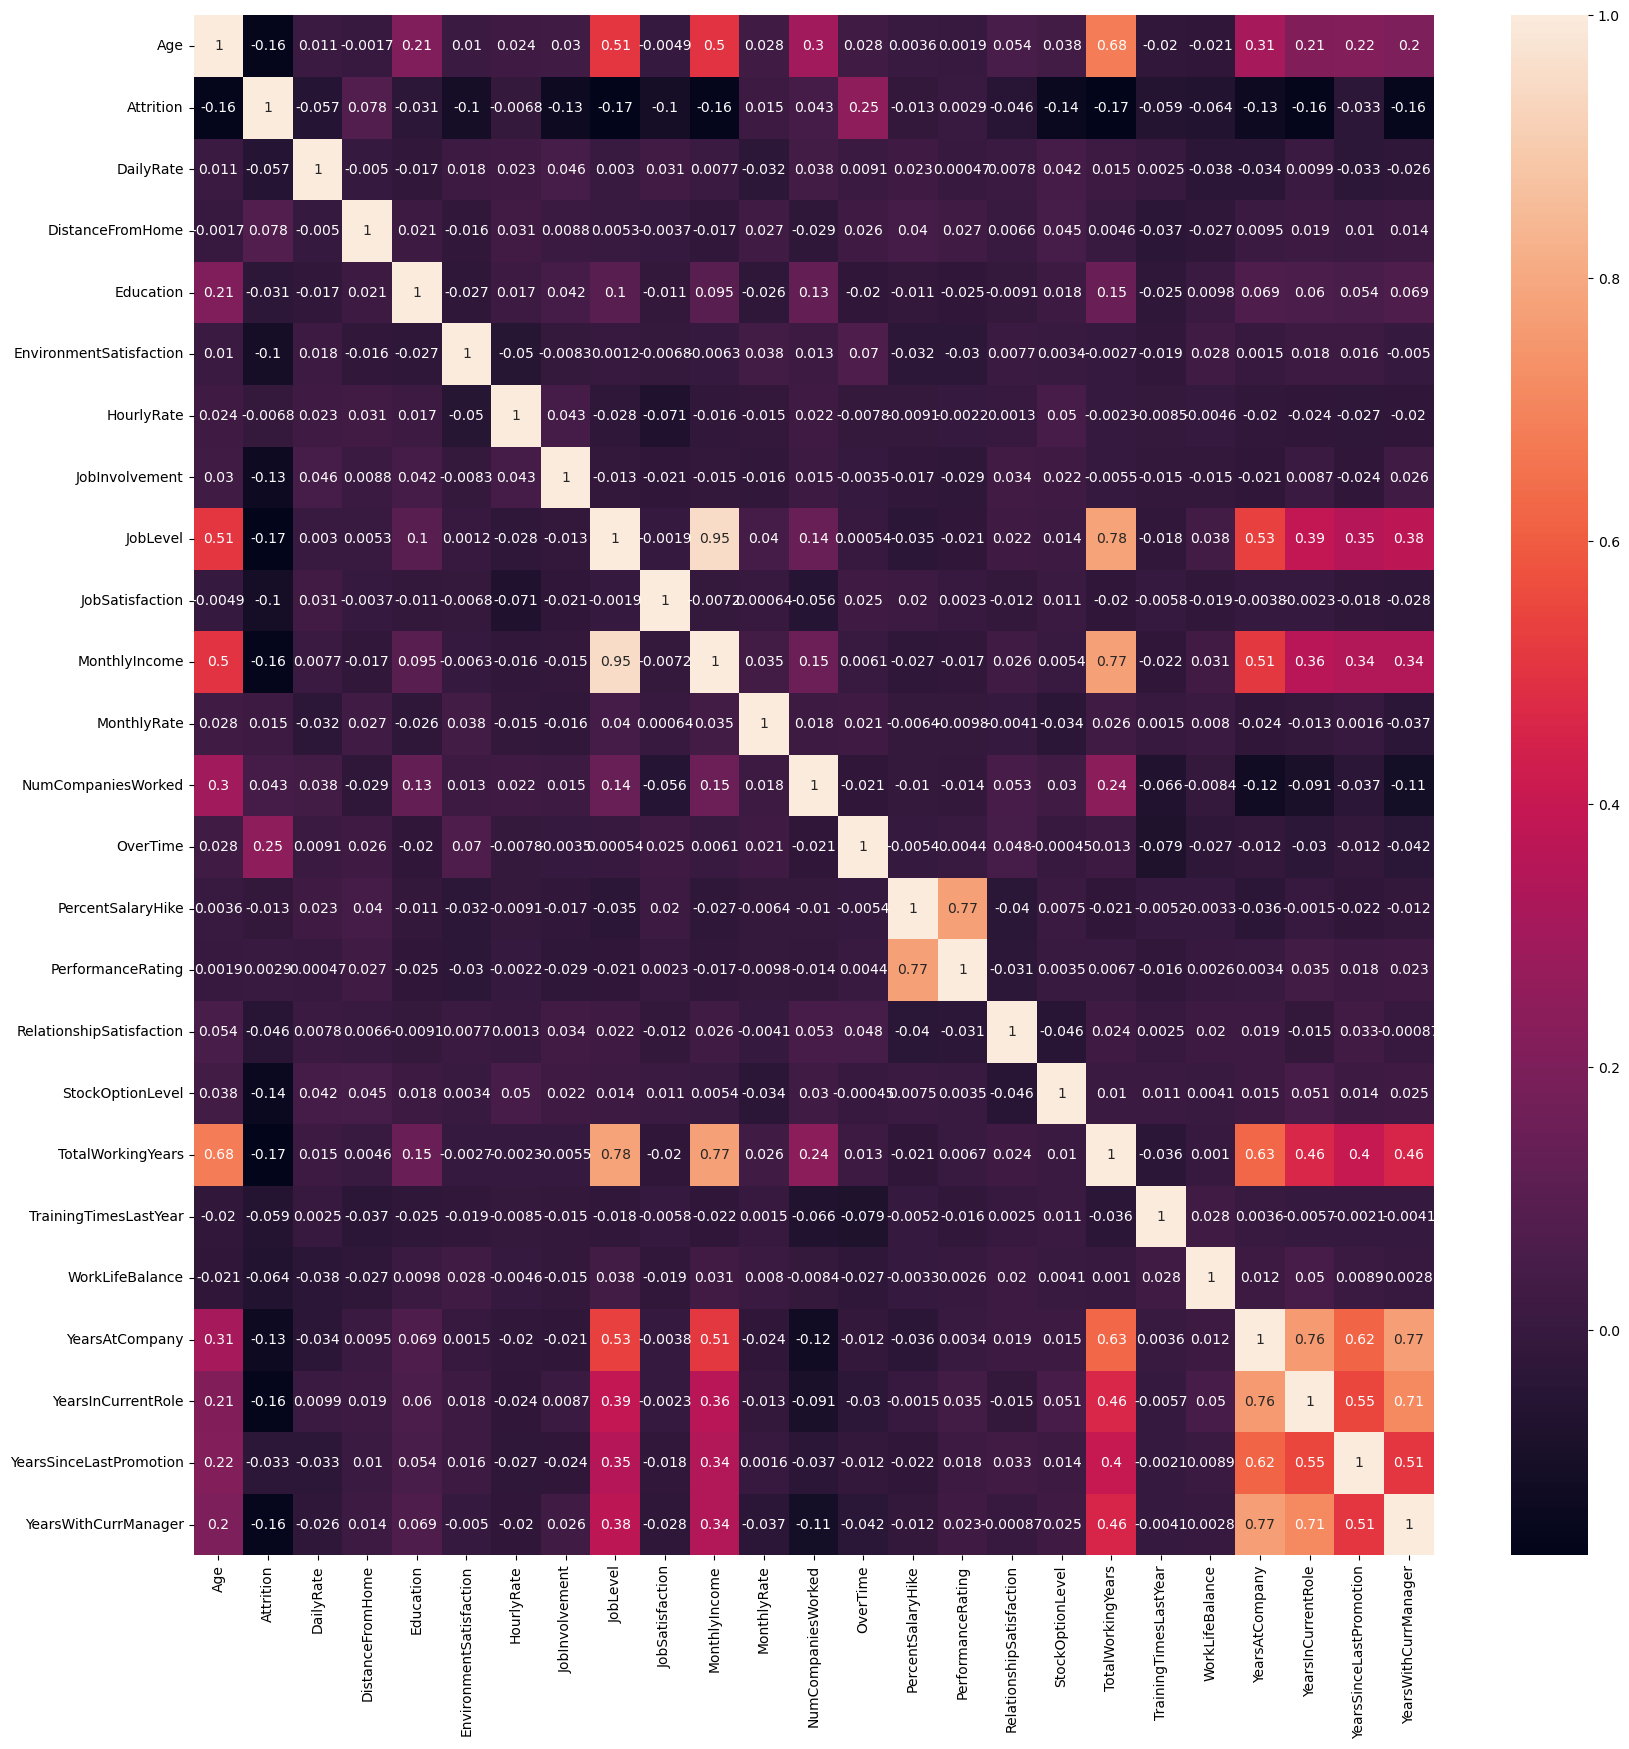

In [22]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# Tạo và cho test mô hình

In [23]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [24]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [25]:
X_cat = pd.DataFrame(X_cat)

In [26]:
X_cat.shape

(1470, 26)

In [27]:
X_cat = pd.DataFrame(X_cat)

In [28]:
X_cat 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [29]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [30]:
# Mã hóa các biến dạng chuỗi
onehotencoder = OneHotEncoder()
X_cat_encoded = onehotencoder.fit_transform(X_cat).toarray()

In [31]:
# Gộp các cột đã mã hóa và các cột số lại
X_all_encoded = pd.concat([pd.DataFrame(X_cat_encoded), X_numerical.reset_index(drop=True)], axis=1)

In [32]:
# Chuyển đổi tên cột thành chuỗi
X_all_encoded.columns = X_all_encoded.columns.astype(str)

In [33]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_all_encoded)

In [34]:
# Hiển thị dữ liệu đã chuẩn hóa
X_scaled

array([[1.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [1.        , 0.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [1.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [35]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Chạy mô hình Random Forest 

In [36]:
# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [37]:
X_train.shape

(1102, 76)

In [38]:
X_test.shape

(368, 76)

In [39]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred = model.predict(X_test)

<Axes: >

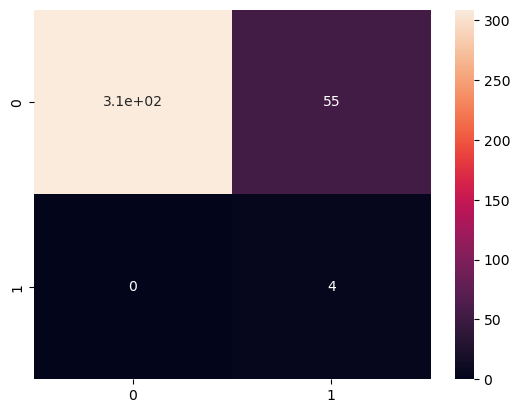

In [41]:
# Kiểm tra kết quả thể hiện
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       309
           1       1.00      0.07      0.13        59

    accuracy                           0.85       368
   macro avg       0.92      0.53      0.52       368
weighted avg       0.87      0.85      0.79       368



# Xác đinh các yếu tố ảnh hưởng tới việc từ bỏ công việc

In [43]:
# Kiểm tra tầm quan trọng của các yếu tố (features)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [44]:
# Lấy ra top 5 yếu tố quan trọng nhất
top_5_features = X_all_encoded.columns[indices][:5]
top_5_importances = importances[indices][:5]

In [47]:
top_5_features

Index(['MonthlyIncome', 'Age', 'OverTime', 'TotalWorkingYears', 'DailyRate'], dtype='object')

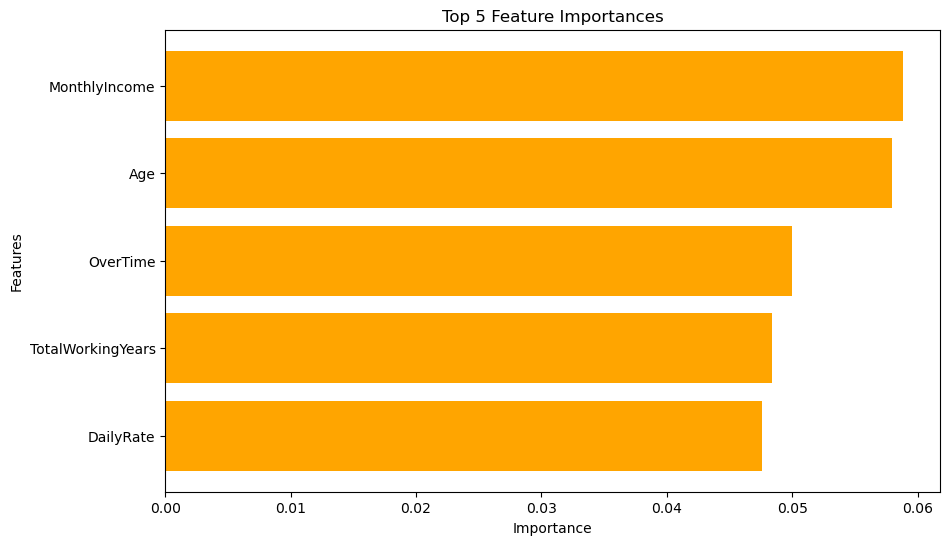

In [46]:
# Vẽ biểu đồ cho top 5 yếu tố quan trọng nhất
plt.figure(figsize=(10, 6))
plt.title("Top 5 Feature Importances")
plt.barh(top_5_features, top_5_importances, color='orange')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Đảo ngược thứ tự trục y để yếu tố quan trọng nhất ở trên cùng
plt.show()

# Đánh giá ảnh hưởng của từng yếu tố

In [85]:
# Chuẩn bị dữ liệu
X = employee_df[['MonthlyIncome', 'Age', 'OverTime', 'TotalWorkingYears', 'DailyRate']]
X = sm.add_constant(X)  # thêm hằng số cho mô hình
y = employee_df['Attrition']

In [86]:
# Xây dựng mô hình hồi quy logistic
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.389775
         Iterations 7


In [87]:
# Hiển thị kết quả
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1464
Method:                           MLE   Df Model:                            5
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                  0.1175
Time:                        20:14:45   Log-Likelihood:                -572.97
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.654e-31
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1757      0.369     -0.476      0.634      -0.899       0.548
MonthlyIncome     -7.291e-05    3.1e-05     -2.356      0.018      -0.000   -1.22e-05
Age                  -0.

# Phân loại nhân viên trong công ty

In [103]:
# Chuẩn bị dữ liệu
X_salary = employee_df[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'JobSatisfaction']]
scaler = MinMaxScaler()
X_salary_scaled = scaler.fit_transform(X_salary)

In [104]:
# Tính toán Distortion Score (Elbow) và Silhouette Score cho từng k
distortions = []
silhouette_scores = []
range_k = range(2, 11)  # Khởi đầu từ 2 cụm vì silhouette không định nghĩa cho k=1

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_salary_scaled)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_salary_scaled, kmeans.labels_))

/Users/namtuyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namtuyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namtuyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namtuyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/n

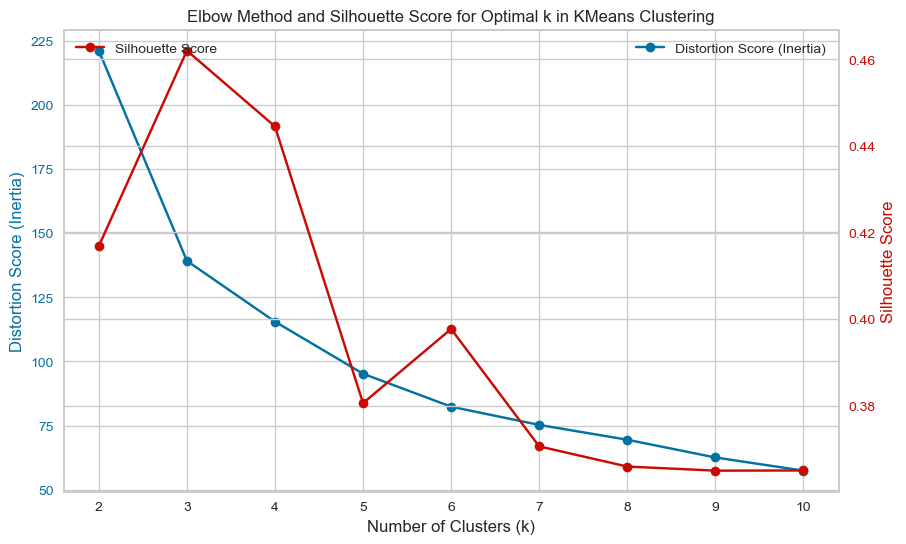

In [106]:
# Vẽ biểu đồ Elbow và Silhouette Score
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ Elbow (Distortion Score)
ax1.plot(range_k, distortions, 'bo-', label='Distortion Score (Inertia)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Distortion Score (Inertia)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Biểu đồ Silhouette Score trên cùng một trục x
ax2 = ax1.twinx()
ax2.plot(range_k, silhouette_scores, 'ro-', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Tiêu đề và chú thích
plt.title('Elbow Method and Silhouette Score for Optimal k in KMeans Clustering')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
plt.grid(True)
plt.show()

/Users/namtuyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namtuyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namtuyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/namtuyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/n

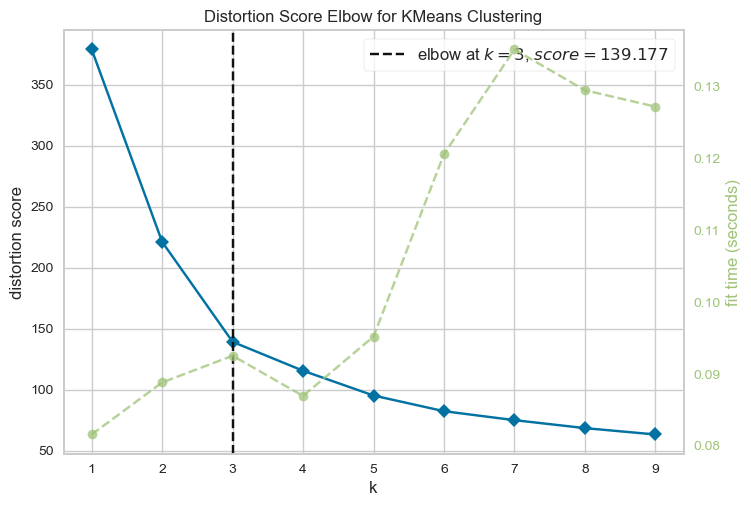

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [108]:
# Tạo mô hình KMeans
kmeans = KMeans()

# Khởi tạo KElbowVisualizer và xác định phạm vi k
visu = KElbowVisualizer(kmeans, k=(1, 10))

# Huấn luyện và hiển thị biểu đồ Elbow
visu.fit(X_salary_scaled)
visu.show()

In [112]:
# Chọn số cụm tối ưu từ kết quả của Elbow và Silhouette Score 
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
employee_df['SalaryCluster'] = kmeans.fit_predict(X_salary_scaled)

/Users/namtuyen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


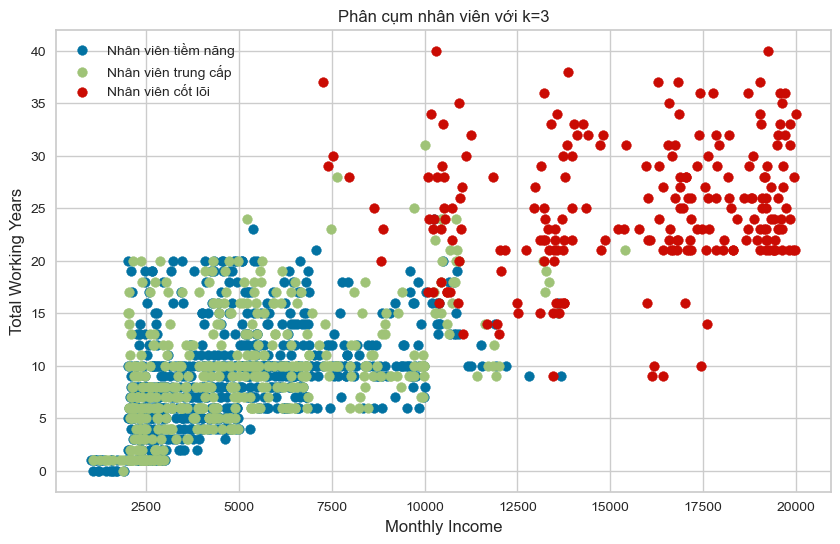

In [113]:
# Vẽ biểu đồ thể hiện các đặc trưng của từng nhóm với k tối ưu
plt.figure(figsize=(10, 6))

# Tên cho từng cụm dựa trên phân tích cụm lương
cluster_labels = {
    0: 'Nhân viên tiềm năng',
    1: 'Nhân viên cốt lõi',
    2: 'Nhân viên trung cấp'
}

# Vẽ điểm theo cụm và thêm nhãn chỉ trong legend
for cluster in employee_df['SalaryCluster'].unique():
    cluster_data = employee_df[employee_df['SalaryCluster'] == cluster]
    plt.scatter(cluster_data['MonthlyIncome'], cluster_data['TotalWorkingYears'], label=f'{cluster_labels[cluster]}')

plt.title(f'Phân cụm nhân viên với k={optimal_k}')
plt.xlabel('Monthly Income')
plt.ylabel('Total Working Years')
plt.legend()  # Hiển thị nhãn trong legend
plt.show()

In [114]:
# Tạo từ điển nhãn cho các cụm
cluster_labels = {
    0: 'Nhân viên tiềm năng',
    1: 'Nhân viên cốt lõi',
    2: 'Nhân viên trung cấp'
}

# Gắn nhãn cho SalaryCluster
employee_df['SalaryClusterLabel'] = employee_df['SalaryCluster'].map(cluster_labels)

# Lấy ra giá trị trung bình của "JobSatisfaction" cho từng cụm
job_satisfaction_clusters = employee_df.groupby('SalaryClusterLabel')['JobSatisfaction'].mean()
job_satisfaction_clusters

SalaryClusterLabel
Nhân viên cốt lõi      2.800885
Nhân viên tiềm năng    3.521854
Nhân viên trung cấp    1.470348
Name: JobSatisfaction, dtype: float64